In [1]:
# Importing the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split

In [2]:
# load the Titanic dataset
titanic_data =pd.read_csv(r"C:\Users\sweth\Downloads\Titanic-Dataset.csv")
# Display first five Salary data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#display information of titanic Dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Describing the titanic Data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Display is there any null values in titanic Dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#using knn imputer to address the Age missing values
from sklearn.impute import KNNImputer
#create an object
imputer_knn=KNNImputer(missing_values=np.nan)
#Fill the missing values for 'Rating'
titanic_data['Age']=imputer_knn.fit_transform(titanic_data[['Age']])
titanic_data['Age']=titanic_data['Age'].astype(int)
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [7]:
# Creating Cabin and Nocabin information for analysis
titanic_data['HasCabin']=titanic_data['Cabin'].apply(lambda x: 0 if x=='NA' else 1)

In [8]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna('S')

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64

In [10]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

# Build Models

In [11]:
x = titanic_data.drop((['Survived' , 'PassengerId']) , axis = 1)
y = titanic_data['Survived']

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [13]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((712, 11), (179, 11), (712,), (179,))

# DecisionTree

In [14]:
def gini(samples):
    sum_samples = sum(samples)
    score=0
    probas=[]
    for sample in samples:
        proba= sample/sum_samples
        probas.append(proba)
    for proba in probas:
        score += proba*(1-proba)
    return score

In [15]:
def entropy(samples):
    sum_samples = sum(samples)
    score=0
    probas=[]
    for sample in samples:
        proba= sample/sum_samples
        probas.append(proba)
    for proba in probas:
        score += proba*np.log(proba)
    return -1*score

In [16]:
samples= [100,25,0]
entropy(samples)

C:\Users\sweth\AppData\Local\Temp\ipykernel_18168\104340150.py:9: RuntimeWarning: divide by zero encountered in log
  score += proba*np.log(proba)
C:\Users\sweth\AppData\Local\Temp\ipykernel_18168\104340150.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  score += proba*np.log(proba)


nan

In [17]:
sex_mapping= {
    'female':0,
    'male':1
}
titanic_data.Sex= titanic_data.Sex.map(sex_mapping)

In [18]:
titanic_data.Pclass.nunique()
features= ['Sex','Pclass']
model= DecisionTreeClassifier()

In [19]:
model.fit(titanic_data[features],titanic_data.Survived)

DecisionTreeClassifier()

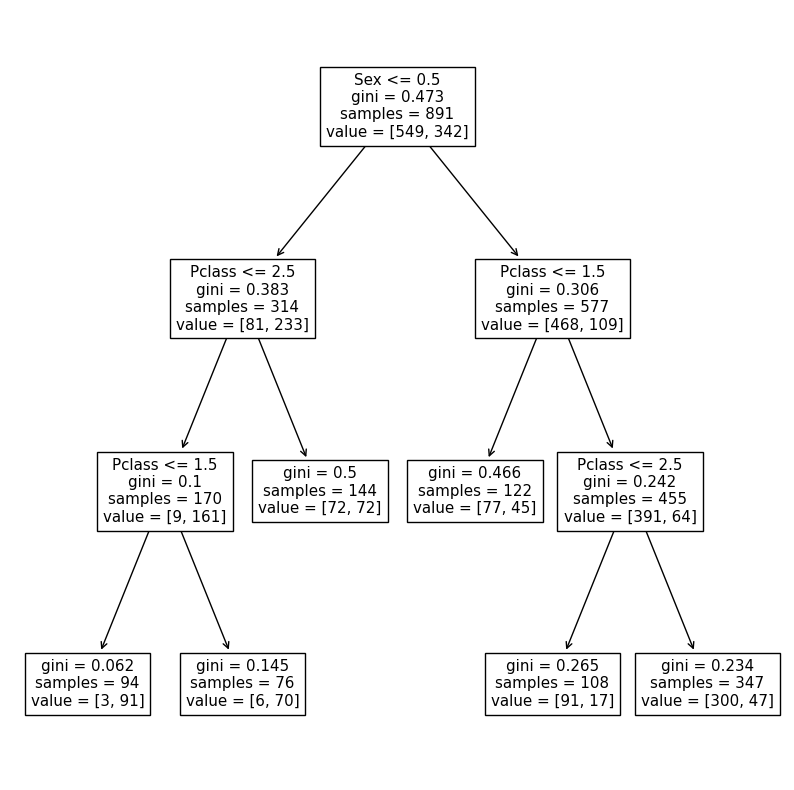

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
plt.figure(figsize= (10,10))
plot_tree(model,feature_names=features)
plt.show()

# Visualizing Dataset 

<Axes: >

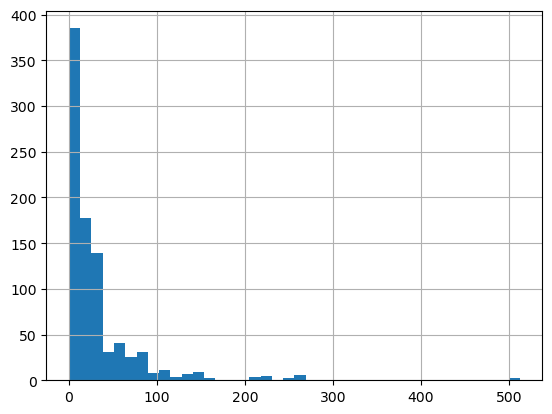

In [21]:
titanic_data['Fare'].hist(bins=40)

In [37]:
# Creating Age group column for analysis
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins=[0,18,35,50,100],labels=['0-18','19-35','36-60','60+'])

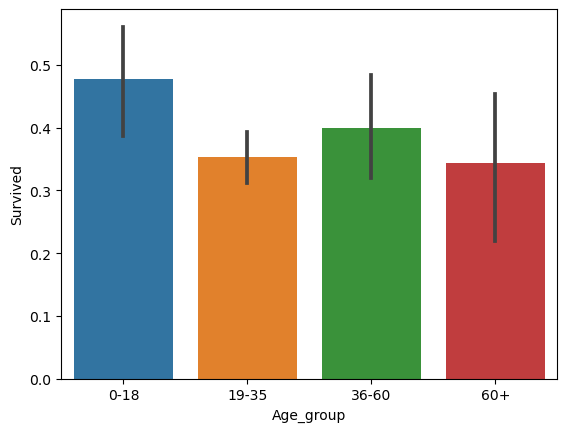

In [38]:
#Survival Rate by Age Groups:
sns.barplot(x='Age_group',y='Survived',data=titanic_data)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

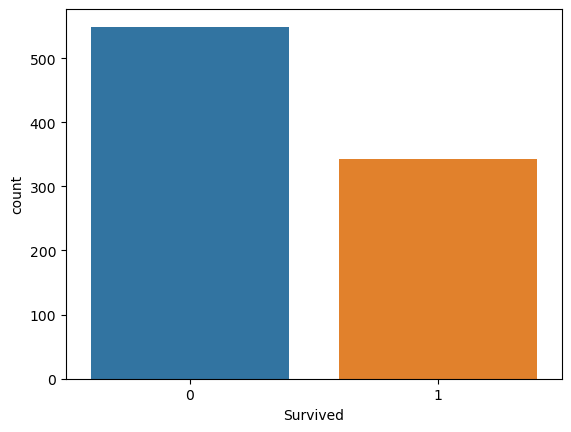

In [23]:
sns.countplot(x = titanic_data.Survived)

<Axes: xlabel='Survived', ylabel='count'>

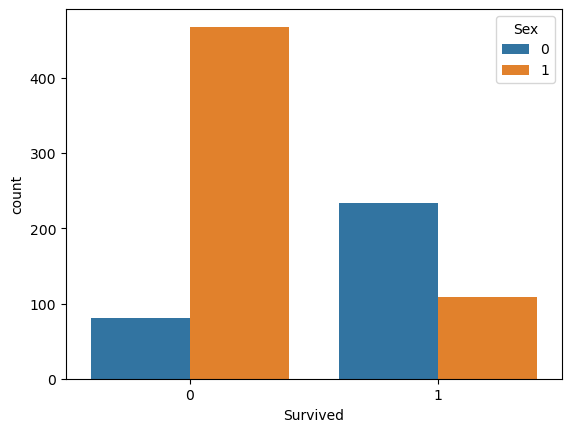

In [24]:
sns.countplot(x = 'Survived' , data=titanic_data ,hue=titanic_data.Sex)

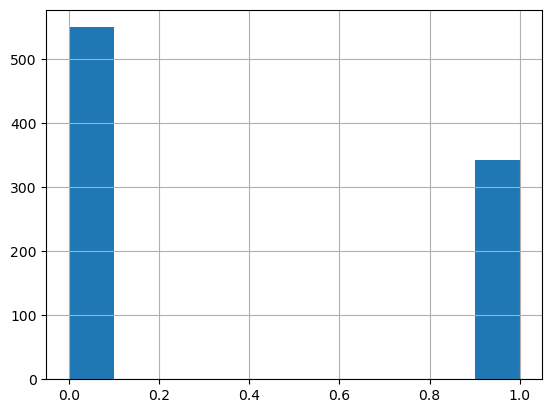

In [25]:
titanic_data['Survived'].hist()
titanic_data['Survived']= titanic_data['Survived'].fillna(titanic_data['Survived'].mean())

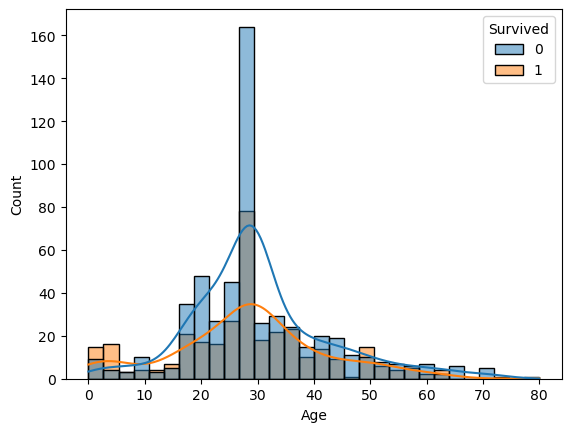

In [26]:
#Age Distribution by Survival:
sns.histplot(x='Age',hue='Survived',data=titanic_data,kde=True)
plt.show()

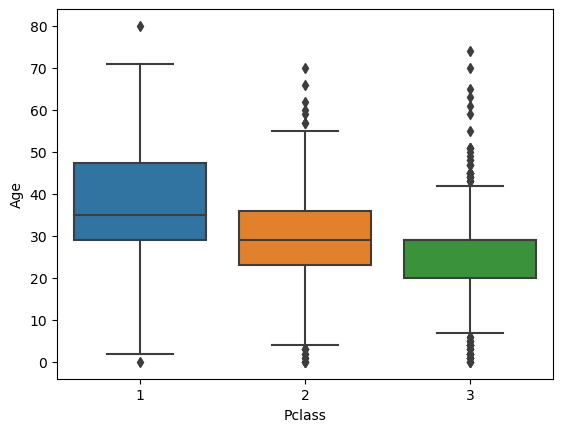

In [27]:
# Boxplot of Age by Pclass:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)
plt.show()